# BigMart Sales Dataset

##### This dataset is designed for predicting sales of various products across different stores based on certain attributes. The dataset contains information about products, stores, and sales, and aims to build a predictive model to forecast Item Outlet Sales for different products in various outlets. Here's an overview of the dataset:

### Variables in the Dataset:
<b>Item_Identifier:</b> A unique identifier for each product.

<b>Item_Weight:</b> Weight of the product.

<b>Item_Fat_Content:</b> Indicates whether the product is low-fat or regular.

<b>Item_Visibility:</b> The percentage of the product’s visibility in the store.

<b>Item_Type:</b> The category/type of the product (e.g., Dairy, Soft Drinks, etc.).

<b>Item_MRP:</b> Maximum retail price of the product.

<b>Outlet_Identifier:</b> A unique identifier for each store or outlet.

<b>Outlet_Establishment_Year:</b> The year when the outlet/store was established.

<b>Outlet_Size:</b> The size of the outlet (Small, Medium, or High).

<b>Outlet_Location_Type:</b> The type of the location (e.g., Tier 1, Tier 2, Tier 3 cities).

<b>Outlet_Type:</b> The type of outlet, whether it’s a grocery store, supermarket, etc.

<b>Item_Outlet_Sales:</b> The target variable — sales of the product at a particular store.

### Problem Statement:
The goal is to <b>predict the Item_Outlet_Sales</b> for each product in various outlets based on the provided attributes. This can help BigMart optimize inventory, improve product placement, and boost sales by understanding the factors influencing sales in different stores.

### Relationships Between Variables:
<b>Item_Visibility</b> and <b>Item_Outlet_Sales:</b> A high visibility product may not always translate to higher sales, so understanding this relationship is key.

<b>Item_Type</b>, <b>Item_MRP</b>, and <b>Item_Fat_Content:</b> These can significantly affect the sales, as certain product types or prices may appeal more to customers in certain outlets.

<b>Outlet_Size</b>, <b>Outlet_Type</b>, and <b>Outlet_Location_Type:</b> These outlet-specific features will likely influence sales based on the demographic and physical store characteristics.

### Target Variable:
The target variable is <b>Item_Outlet_Sales</b>, which represents the total sales of the product at a particular store.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("C:/Users/HP/BigMart-Sales-Analysis/Train.csv")
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
print("Shape of the dataset is: ", dataset.shape)

Shape of the dataset is:  (8523, 12)


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Observation from information about the dataset - Null values are present in the Item_Weight and Outlet_Size variables

##### Checking on NULL values

In [7]:
print("Checking the number of null values present in the dataset: ")
dataset.isnull().sum()

Checking the number of null values present in the dataset: 


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
print("Going further to check the percentage of missing values in the dataset: ")
percentage_null = dataset.isnull().sum() * 100 / len(dataset)
percentage_null

Going further to check the percentage of missing values in the dataset: 


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

##### Checking on DUPLICATE values

In [9]:
print("Checking for duplicate values present in the dataset: ")
dataset.duplicated()

Checking for duplicate values present in the dataset: 


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [10]:
print("Sum of duplicated values in the dataset: ", dataset.duplicated().sum())

Sum of duplicated values in the dataset:  0


In [11]:
print("Any duplicated values in the dataset: ", dataset.duplicated().any())

Any duplicated values in the dataset:  False


#### Observation - There are no <b>duplicate</b> values in the dataset

### Handling missing/NULL values

### 1. Missing values in the Item_Weight variable - NUMERICAL column

#### Using UNIVARIATE IMPUTATION methods to fill in the values

In [12]:
# Using MEAN
mean_weight = dataset['Item_Weight'].mean()
print("Filling missing values in the Item_Weight variable using the Univarite imputation Mean method whose value in this case is: ")
mean_weight

Filling missing values in the Item_Weight variable using the Univarite imputation Mean method whose value in this case is: 


12.857645184135976

In [13]:
# Filling missing values with the MEAN while creating a new column
dataset['Item_Weight_Mean'] = dataset['Item_Weight'].fillna(mean_weight)
dataset['Item_Weight_Mean']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_Mean, Length: 8523, dtype: float64

In [14]:
# Using MEDIAN
median_weight = dataset['Item_Weight'].median()
print("Filling missing values in the Item_Weight variable using the Univarite imputation Median method whose value in this case is: ")
median_weight

Filling missing values in the Item_Weight variable using the Univarite imputation Median method whose value in this case is: 


12.6

In [15]:
# Filling missing values with the MEDIAN while creating a new column
dataset['Item_Weight_Median'] = dataset['Item_Weight'].fillna(median_weight)
dataset['Item_Weight_Median']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_Median, Length: 8523, dtype: float64

##### Checking the variance between the two methods

In [16]:
print("Actual Item_Weight column variance: ", dataset['Item_Weight'].var())

Actual Item_Weight column variance:  21.56168825983637


In [17]:
print("Mean imputed Item_Weight column variance: ", dataset['Item_Weight_Mean'].var())

Mean imputed Item_Weight column variance:  17.860121735060453


In [18]:
print("Median imputed Item_Weight column variance: ", dataset['Item_Weight_Median'].var())

Median imputed Item_Weight column variance:  17.869561454073366


##### Observation - No major change in variance between the two imputations

##### Checking the distribution between the three columns

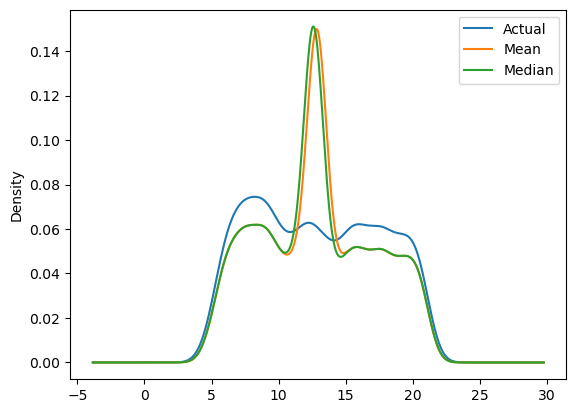

In [19]:
dataset['Item_Weight'].plot(kind='kde', label='Actual')
dataset['Item_Weight_Mean'].plot(kind='kde', label='Mean')
dataset['Item_Weight_Median'].plot(kind='kde', label='Median')
plt.legend()
plt.show()

#### Observation -  On applying Mean and Median imputation, the data distribution has been altered. Most of the data is clustered around mean and median which means this is NOT the optimal solution.

<Axes: >

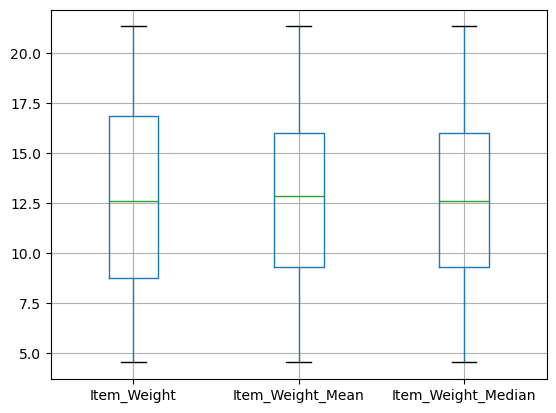

In [20]:
# BOX plot visualization of the columns
dataset[['Item_Weight', 'Item_Weight_Mean', 'Item_Weight_Median']].boxplot()

#### Observation -  With the BOX plot, there's a reduction in the spread of the data

##### Trying another Univariate Imputation method - INTERPOLATION

In [21]:
dataset['Item_Weight_Interpolated'] = dataset['Item_Weight'].interpolate(method='linear')
dataset['Item_Weight_Interpolated']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_Interpolated, Length: 8523, dtype: float64

##### Linear interpolation estimates missing values in the dataset ny drawing a straight line btwn two neghbouring data points & filing the missing values with values along that line.

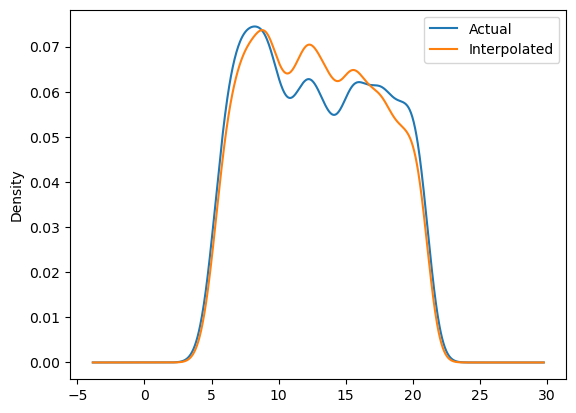

In [22]:
dataset['Item_Weight'].plot(kind='kde', label='Actual')
dataset['Item_Weight_Interpolated'].plot(kind='kde', label='Interpolated')
plt.legend()
plt.show()

##### After interpolation, the distribution btwn the original and interpolated columns is very close.
##### Therefore INTERPOLATION is the better method in this case

#### Using MULTIVARIATE IMPUTATION methods to fill in the values

##### Using the K-Nearest Neighbors Imputation method
###### The K-Nearest Imputer works by identifying the K nearest data points with available values for the missing entry and then compute an average/weighted-average of those values to fill the missing entry.
###### It is based on the principle that similar data points often have similar values

In [23]:
from sklearn.impute import KNNImputer

In [24]:
# Creating an instance of the imputer
knn = KNNImputer(n_neighbors=10, weights='distance')

In [25]:
dataset['Item_Weight_KNN'] = knn.fit_transform(dataset[['Item_Weight']]).ravel()
dataset[['Item_Weight_KNN']]

,Item_Weight_KNN
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


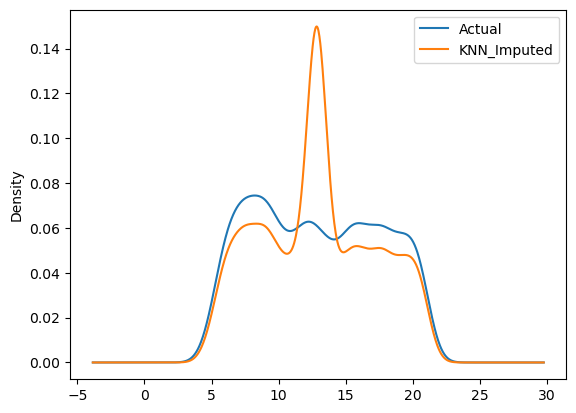

In [26]:
dataset['Item_Weight'].plot(kind='kde', label='Actual')
dataset['Item_Weight_KNN'].plot(kind='kde', label='KNN_Imputed')
plt.legend()
plt.show()

#### Observation -  On applying KNN imputation, the data distribution has been altered, meaning this is NOT the optimal solution.

### Best solution for filling the 'Item_Weight' numeric column in this case is using the INTERPOLATION method

In [27]:
# Dropping the unnecessary columns associated with the Item_Weight variable
dataset = dataset.drop(['Item_Weight', 'Item_Weight_Mean', 'Item_Weight_Median', 'Item_Weight_KNN'], axis=1)

In [28]:
dataset

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolated
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [29]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Interpolated        0
dtype: int64

### 1. Missing values in the Outlet_Size variable - CATEGORICAL column

In [30]:
dataset['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
# Similar column to Outlet_Size is Outlet_Type
dataset['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### Filling missing in the 'Outlet_Size' variable based on the 'Outlet_Type' variable

In [32]:
outlet_mode = dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x:x.mode()[0])
outlet_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


##### 'Small' is the most frequent 'Outlet_Size' type in the 'Outlet_Type'  Grocery Store
##### 'Small' is the most frequent 'Outlet_Size' type in the 'Outlet_Type'  Supermarket Type1
##### 'Medium' is the most frequent 'Outlet_Size' type in the 'Outlet_Type'  Supermarket Type2
##### 'Medium' is the most frequent 'Outlet_Size' type in the 'Outlet_Type'  Supermarket Type3

In [33]:
missing_outlet_size = dataset['Outlet_Size'].isnull()
missing_outlet_size

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [34]:
# Filling the missing values
dataset.loc[missing_outlet_size, 'Outlet_Size'] = dataset.loc[missing_outlet_size, 'Outlet_Type'].apply(lambda x:outlet_mode[x])

In [35]:
dataset.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Interpolated     0
dtype: int64

#### There are no more missing values in the dataset

### Working on other columns in the dataset

##### 1. Item_Fat_Content

In [36]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

##### There's consistent labeling of the main classes 'Low Fat'(LF, low fat) and 'Regular'(reg)

In [37]:
# Using python dictionary to replace this values
dataset.replace({'Item_Fat_Content': {'Low Fat': 'low_fat', 'low fat': 'low_fat', 'LF': 'low_fat', 'reg': 'regular', 'Regular': 'regular'}}, inplace=True)

In [38]:
dataset['Item_Fat_Content'].value_counts()

low_fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

##### 2. Item_Visibility

In [39]:
dataset[['Item_Visibility']].value_counts()

Item_Visibility
0.000000           526
0.076975             3
0.076856             2
0.107663             2
0.014048             2
                  ... 
0.038729             1
0.038725             1
0.038722             1
0.038721             1
0.328391             1
Length: 7880, dtype: int64

In [40]:
# Change the 0 values with numpy nan so that we can handle them as missing values with the INTERPOLATE method
dataset['Item_Visibility_Interpolated'] = dataset['Item_Visibility'].replace(0, np.nan).interpolate(method='linear')
dataset[['Item_Visibility_Interpolated']]

,Item_Visibility_Interpolated
0,0.016047
1,0.019278
2,0.016760
3,0.015755
4,0.014751
...,...
8518,0.056783
8519,0.046982
8520,0.035186
8521,0.145221


In [41]:
dataset['Item_Visibility_Interpolated'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_Interpolated, Length: 8405, dtype: int64

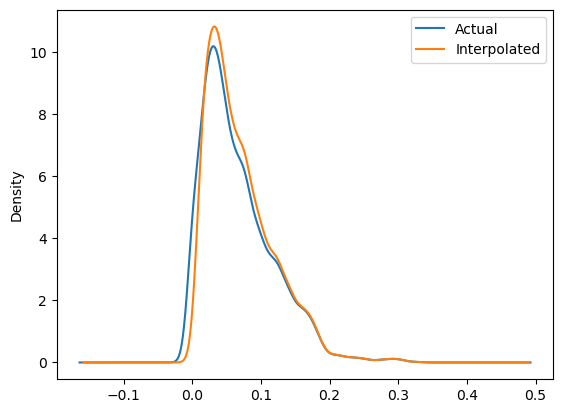

In [42]:
# Checking distribution before and after interpolation of the 'Item_Visibility' column
dataset['Item_Visibility'].plot(kind='kde', label='Actual')
dataset['Item_Visibility_Interpolated'].plot(kind='kde', label='Interpolated')
plt.legend()
plt.show()

##### Observation - distribution remains very close, meaning interpolation in this case the optimal solution to handle zeroes in the 'Item_Visibility' column

In [43]:
# Dropping the original column
dataset = dataset.drop('Item_Visibility', axis=1)
dataset

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolated,Item_Visibility_Interpolated
0,FDA15,low_fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047
1,DRC01,regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278
2,FDN15,low_fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760
3,FDX07,regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755
4,NCD19,low_fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,low_fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783
8519,FDS36,regular,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982
8520,NCJ29,low_fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186
8521,FDN46,regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221


##### 3. Item_Type

In [44]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

##### 4. Item_Identifier

In [45]:
dataset['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [46]:
# Make the column only contain the 1st two characters: FD(Foods), NC(Non-consumables), DR(Drinks)
dataset['Item_Identifier'] = dataset['Item_Identifier'].apply(lambda x : x[:2])
dataset['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

##### 5. Outlet_Establishment_Year

In [47]:
dataset['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [48]:
# We can check for how long the establishment has existed since its establishment year
import datetime as dt
to_date = dt.datetime.today().year
to_date

2024

In [49]:
dataset['Outlet_Age'] = to_date - dataset['Outlet_Establishment_Year']
dataset['Outlet_Age']

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Age, Length: 8523, dtype: int64

In [50]:
dataset.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolated,Item_Visibility_Interpolated,Outlet_Age
0,FD,low_fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [51]:
dataset = dataset.drop('Outlet_Establishment_Year', axis=1)

In [52]:
dataset.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolated,Item_Visibility_Interpolated,Outlet_Age
0,FD,low_fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


### We have categorical data in the dataset, therefore there is need to perform ORDINAL ENCODING on those variables

#### Here we are performing encoding on INPUT variables

In [53]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding a copy of the dataset
encoded_dataset = dataset.copy()

# Selecting ONLY the categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

for column in categorical_columns:
    # Create instance of ordinal encoder
    ordinal_encoder = OrdinalEncoder()
    encoded_dataset[column] = ordinal_encoder.fit_transform(encoded_dataset[[column]])
    print(ordinal_encoder.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['low_fat', 'regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [54]:
encoded_dataset.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolated,Item_Visibility_Interpolated,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15


In [55]:
# Storing INDEPENDENT variables in matrix X and DEPENDENT variables in y
X = encoded_dataset.drop('Item_Outlet_Sales', axis=1)
y = encoded_dataset['Item_Outlet_Sales']

In [56]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### The target variable 'Item_Outlet_Sales' is a continuous variable, which makes this a regression problem

### We can therefore try 2 regression models: Random Forest Regressor & XGBRFRegressor

### 1. Using the Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

#To perform cross-validation
from sklearn.model_selection import cross_val_score

print("Creating an instance of the random forest regressor...")
rand_forest = RandomForestRegressor(n_estimators=100, random_state=42)

print("Performing 5 fold cross-validation with r-squared(r2) score...")
score = cross_val_score(rand_forest, X, y, cv=5, scoring='r2')
print("Average value of this score: ", score.mean())

Creating an instance of the random forest regressor...
Performing 5 fold cross-validation with r-squared(r2) score...
Average value of this score:  0.5549992903957147


### 2. Using the XGBRFRegressor

In [60]:
!pip install xgboost
from xgboost import XGBRFRegressor

print("Creating instance of XGBRFRegressor... ")
xg_reg = XGBRFRegressor(n_estimators=100, random_state=42)

print("Performing 5 fold cross-validation with r-squared(r2) score...")
score = cross_val_score(xg_reg, X, y, cv=5, scoring='r2')
print("Average value of this score: ", score.mean())

     ------------------------------------ 124.9/124.9 MB 411.8 kB/s eta 0:00:00
Creating instance of XGBRFRegressor... 
Performing 5 fold cross-validation with r-squared(r2) score...
Average value of this score:  0.5956602202104594


### From the scores, the XGBRFRegressor is the better option for this dataset

#### Checking feature importance of the present features in this dataset for the XGBRFRegressor

In [61]:
# Fitting the independent and dependent variables to the XGBRFRegressor instance
xg_reg1 = xg_reg.fit(X, y)

# Creating pandas dataframe
pd.DataFrame({
    'feature': X.columns,
    'XGBRF_importance': xg_reg1.feature_importances_
}).sort_values(by='XGBRF_importance', ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.423386
10,Outlet_Age,0.169442
3,Item_MRP,0.160600
5,Outlet_Size,0.101296
4,Outlet_Identifier,0.099362
6,Outlet_Location_Type,0.036353
9,Item_Visibility_Interpolated,0.003181
8,Item_Weight_Interpolated,0.002475
2,Item_Type,0.002263
0,Item_Identifier,0.000967


#### We can consider the 1st 5 features, since they have the higher scores

In [63]:
print("Dropping the unnecessary columns... ")
X = X.drop(['Outlet_Location_Type', 'Item_Visibility_Interpolated', 'Item_Weight_Interpolated', 'Item_Type', 'Item_Identifier', 'Item_Fat_Content'], axis=1)
X.head(1)

Dropping the unnecessary columns... 


,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,25


In [64]:
print("Performing 5 fold cross-validation with r-squared(r2) score after dropping the columns...")
score = cross_val_score(xg_reg1, X, y, cv=5, scoring='r2')
print("Average value of this score: ", score.mean())

Performing 5 fold cross-validation with r-squared(r2) score after dropping the columns...
Average value of this score:  0.596332173045327


##### There's an improvement in the score after dropping the unnecessary columns

### Training our best model on the entire(modified) dataset

In [65]:
print("Creating FINAL instance of XGBRFRegressor... ")
xg_final = XGBRFRegressor()

Creating FINAL instance of XGBRFRegressor... 


In [66]:
print("Training our final model on the final dataset... ")
xg_final.fit(X, y)

Training our final model on the final dataset... 


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

#### Calculating Mean Absolute Error - MAE

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
xg_final.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [71]:
y_pred = xg_final.predict(X_test)
y_pred

array([1253.4097 ,  689.1149 ,  687.9451 , ...,  683.35864,  729.3192 ,
       1620.5225 ], dtype=float32)

In [72]:
mean_absolute_error(y_test, y_pred)

713.5792228647217

### Conclusion - The MAE being 713.58 means that on average, the absolute difference between the predicted values and the actual values is 713.58

#### In practical terms, this suggests that the model's predictions are on average of y, approximately 713.58 units from the actual values (Note: not exactly, but approximately)